## 03-Exploring the relationship
### 1 Exporting libraries and file
### 2 Checking duplicates
### 3 Checking Mixed Dtype
### 4 Exploring Relationship
### 5 Creating heatmap
### 6 Creating Scatterplot
### 7 Creating the pairplot
### 8 Creating the Categorical Plots
### 9 8 Creating categorical plot with a new variable

### 03-1 Exporting libraries and file

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# This option ensures the created charts will be displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#importing file
path=r'C:\Users\user\11-2023 Real Estate Sales Connecticut'

In [4]:
df_re=pd.read_csv(os.path.join(path,'Data','Prepared Data','realestate_clean.csv'), index_col=0)

### 03-2 Checking duplicates

In [5]:
# Find duplicates

df_re_dups = df_re[df_re.duplicated()]

In [6]:
df_re_dups.shape #no duplicates!

(0, 11)

### 03-3 Checking Mixed Dtype

In [7]:
for col in df_re.columns.tolist():
      weird = (df_re[[col]].applymap(type) != df_re[[col]].iloc[0].apply(type)).any(axis = 1)
      if len (df_re[weird]) > 0:
        print (col)
# No mixed-type columns either!

C:\Users\user\AppData\Local\Temp\ipykernel_1576\380079024.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_re[[col]].applymap(type) != df_re[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\user\AppData\Local\Temp\ipykernel_1576\380079024.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_re[[col]].applymap(type) != df_re[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\user\AppData\Local\Temp\ipykernel_1576\380079024.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_re[[col]].applymap(type) != df_re[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\user\AppData\Local\Temp\ipykernel_1576\380079024.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  weird = (df_re[[col]].applymap(type) != df_re[[col]].iloc[0].apply(type)).any(axis = 1)
C:\Users\user\AppData\Local\Temp\ipykernel_1576\38007902

### 03-4 Exploring Relationship

#### Correlations

In [8]:
# Create a subplot with numerical data only
df_num=df_re[['Serial Number','List Year','Year of Sale','Assessed Value','Sale Amount','Sales Ratio','Month of Sale']]

In [9]:
df_re.head(2)

,Serial Number,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Year of Sale,Month of Sale
0,2020348,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Non Residental,2021,9
1,20002,2020,Ashford,390 TURNPIKE RD,253000.0,430000.0,0.5883,Residential,Single Family,2020,10


In [10]:
df_num.head(2)

,Serial Number,List Year,Year of Sale,Assessed Value,Sale Amount,Sales Ratio,Month of Sale
0,2020348,2020,2021,150500.0,325000.0,0.4630,9
1,20002,2020,2020,253000.0,430000.0,0.5883,10


In [11]:
df_num.corr()

,Serial Number,List Year,Year of Sale,Assessed Value,Sale Amount,Sales Ratio,Month of Sale
Serial Number,1.000000,0.079818,0.080334,-0.001268,0.000477,-0.000285,-0.001747
List Year,0.079818,1.000000,0.997576,0.034711,0.029669,-0.003305,0.018946
Year of Sale,0.080334,0.997576,1.000000,0.034883,0.029822,-0.003229,-0.032311
Assessed Value,-0.001268,0.034711,0.034883,1.000000,0.435995,0.004603,0.000405
Sale Amount,0.000477,0.029669,0.029822,0.435995,1.000000,-0.001384,0.001592
Sales Ratio,-0.000285,-0.003305,-0.003229,0.004603,-0.001384,1.000000,-0.001088
Month of Sale,-0.001747,0.018946,-0.032311,0.000405,0.001592,-0.001088,1.000000


### 03-5 Creating heatmap

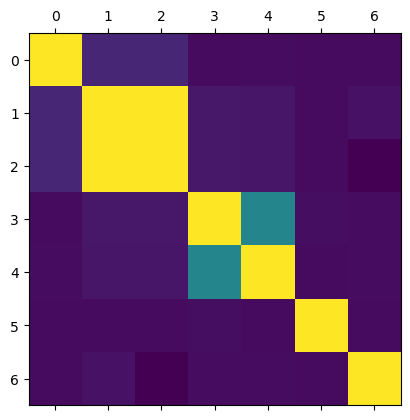

In [12]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_num.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

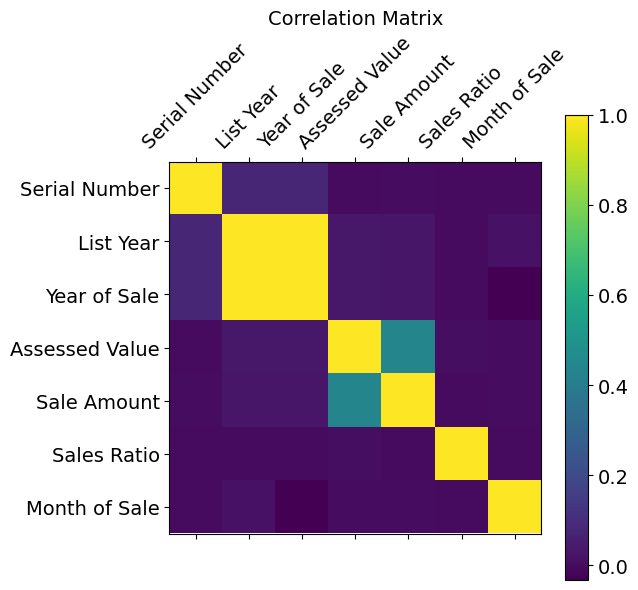

In [13]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6)) # figure size 
plt.matshow(df_num.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_num.shape[1]), df_num.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df_num.shape[1]), df_num.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

In [14]:
# Save figure
f.savefig("out.png") 

#### Conclusions:
#### 1. The majority of correlation indexes are low, indicating either a lack of correlation or very weak correlation. The highest correlation, at only 0.43, is between Sale Amount and Assessed Value. This suggests that expertsvaluation has limited accuracyy, and the expert valuation system for Real Estate in Connecticutcan be improvede.
#### 2. An exceptional case is seen in the correlation between List Year and Year of Sale, which is close to 1.0. This result indicates that Real Estate in Connecticut is highly sought after and is being sold very quickly.
#### 3. The absence of correlation between the Month of Sale and the other variables indicates that there is no special seasonality for more or less expensive Real Estate in this US region. Seasonality may only affect the quantity of Real Estates sold in a month.  

### 03-6 Creating Scatterplot

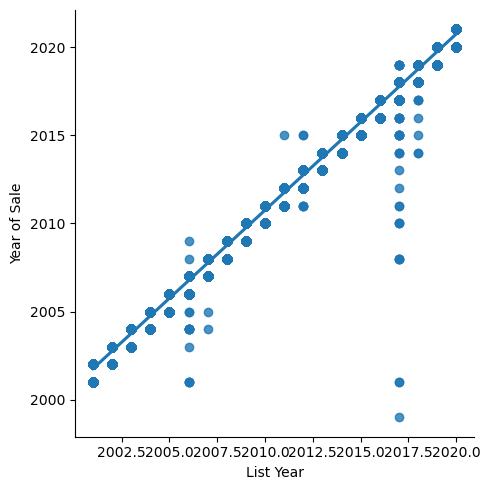

In [15]:
# Create a scatterplot for the "List Year" and "Year of Sale" columns in seaborn

sns.lmplot(x = 'List Year', y = 'Year of Sale', data = df_num)

#### Conclusions:
#### 1. Properties that were sold immediately in the same year as they were listed for sale align along a line with a 45-degree decline.
#### 2. Below this line, we find properties that were registered after their sale. This highlights a notable increase in delayed property registrations in 2006 and 2016.
#### 3. The real estate market in the Connecticut region did not exhibit any significant changes in 2020, indicating that the dynamics of property sales were not influenced by Covid during that year.  

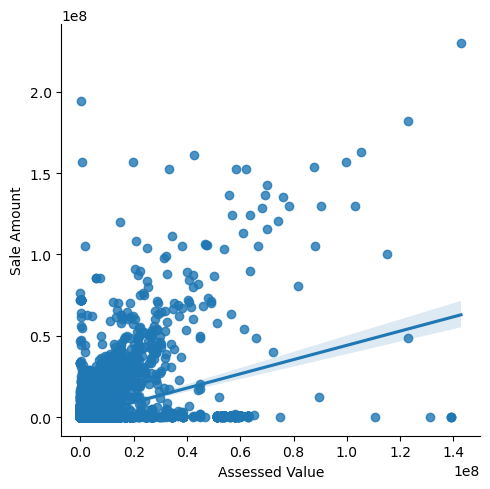

In [16]:
# Create a scatterplot for the "Asessed Value" and "Sale amount" columns in seaborn

sns.lmplot(x = 'Assessed Value', y = 'Sale Amount', data = df_num)

##### Conclusions:##### 
The distribution of Assessed Amount indicates an optimistic forecast for Real Estate sales:
#####  the majority of properties were sold at prices higher than the assessed amount.
#####  The trend line on the plot is shifted downward due to a large number of unsold properties with a sale amount of 0.  

### 03-7 Creating the pairplot

In [17]:
# Create a subplot with the non categorical and numerical data only
df_num=df_re[['Serial Number','Assessed Value','Sale Amount','Sales Ratio']]

In [18]:
# Keeping only the more interesting price range

# Sale Amount <=1000,000.00
df1 = df_num[df_num['Sale Amount'] <= 1000000]

# 1000,000.00 <Sale Amount <=4000,000.00
df2 = df_num[(df_num['Sale Amount'] > 1000000) & (df_num['Sale Amount'] <= 4000000)]

# 4000,000.00 <Sale Amount <=10,000,000.00
df3 = df_num[(df_num['Sale Amount'] > 4000000) & (df_num['Sale Amount'] <= 10000000)]


C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

MemoryError: 

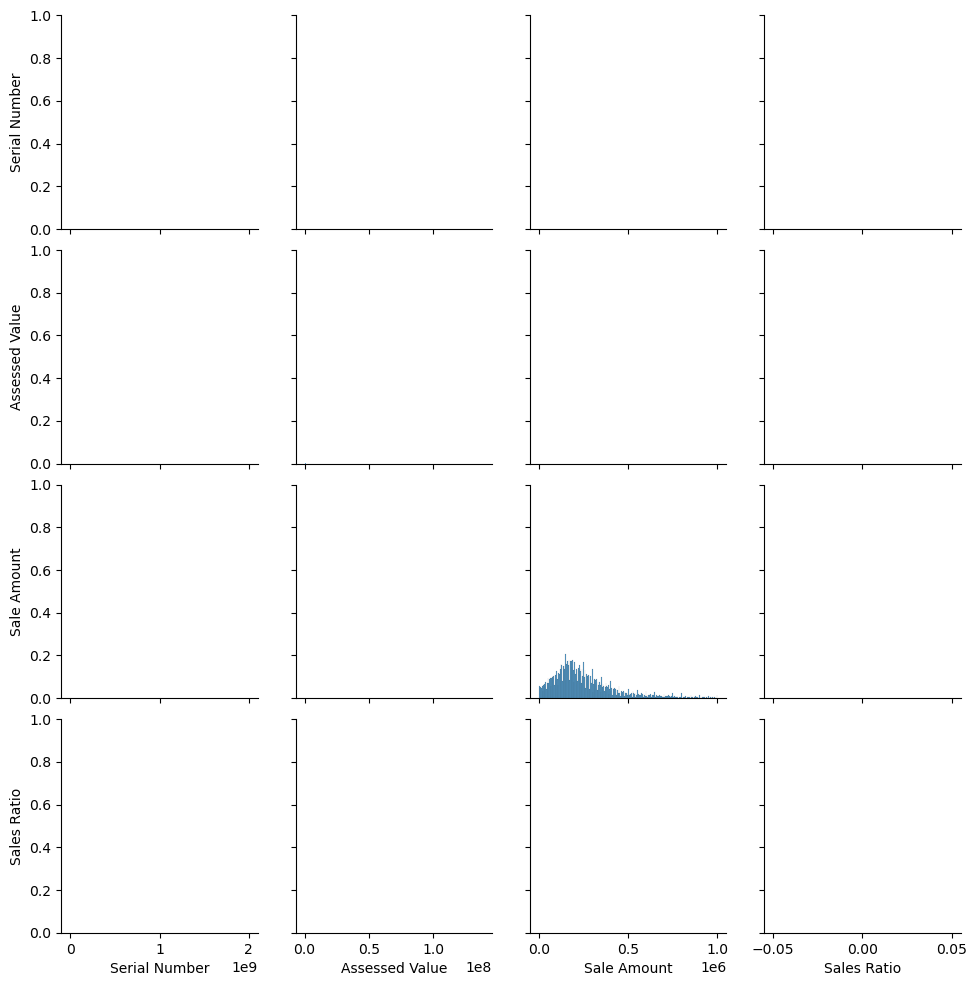

In [19]:
pairplot1=sns.pairplot(df1)
plt.show()

In [20]:
pairplot1.savefig(os.path.join(path, 'Analytics', 'range1_pairplot.png'))

NameError: name 'pairplot1' is not defined

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

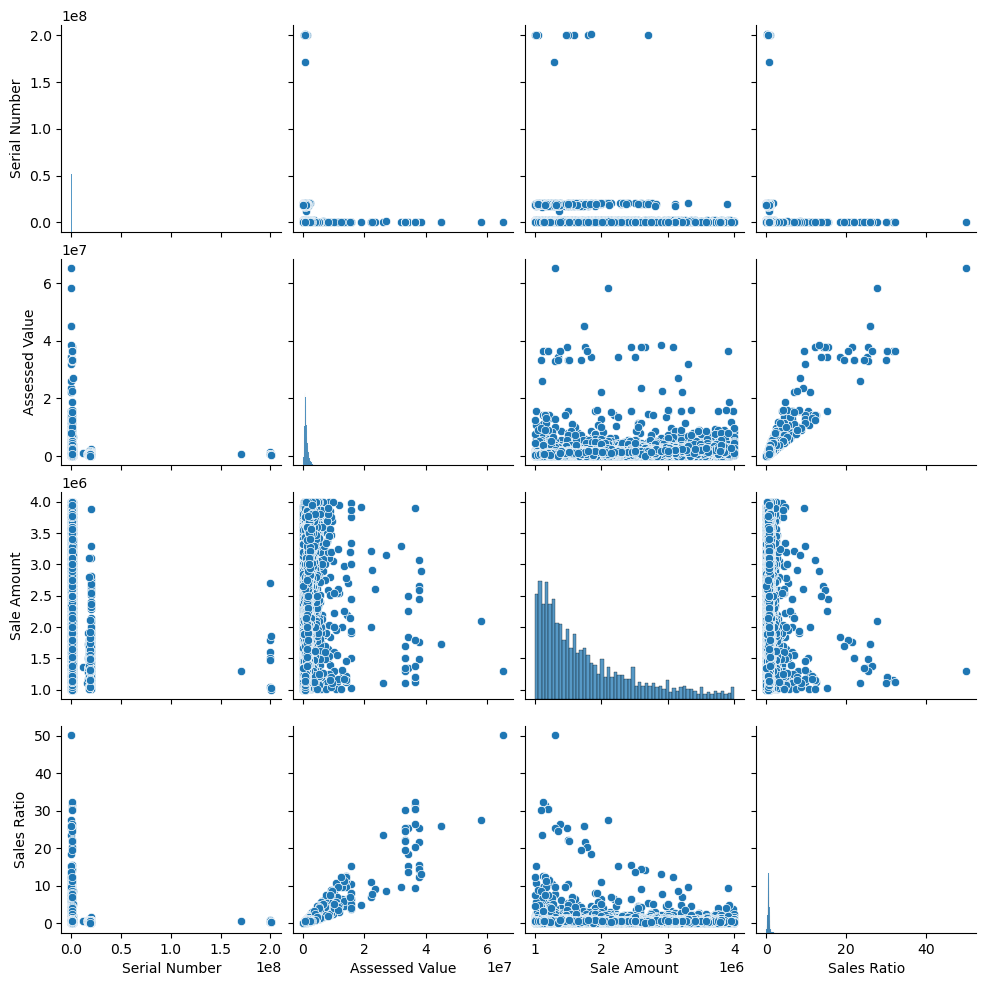

In [21]:
pairplot2=sns.pairplot(df2)
plt.show()

In [22]:
###saving pairplot
pairplot2.savefig(os.path.join(path, 'Analytics', 'range2_pairplot.png'))

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

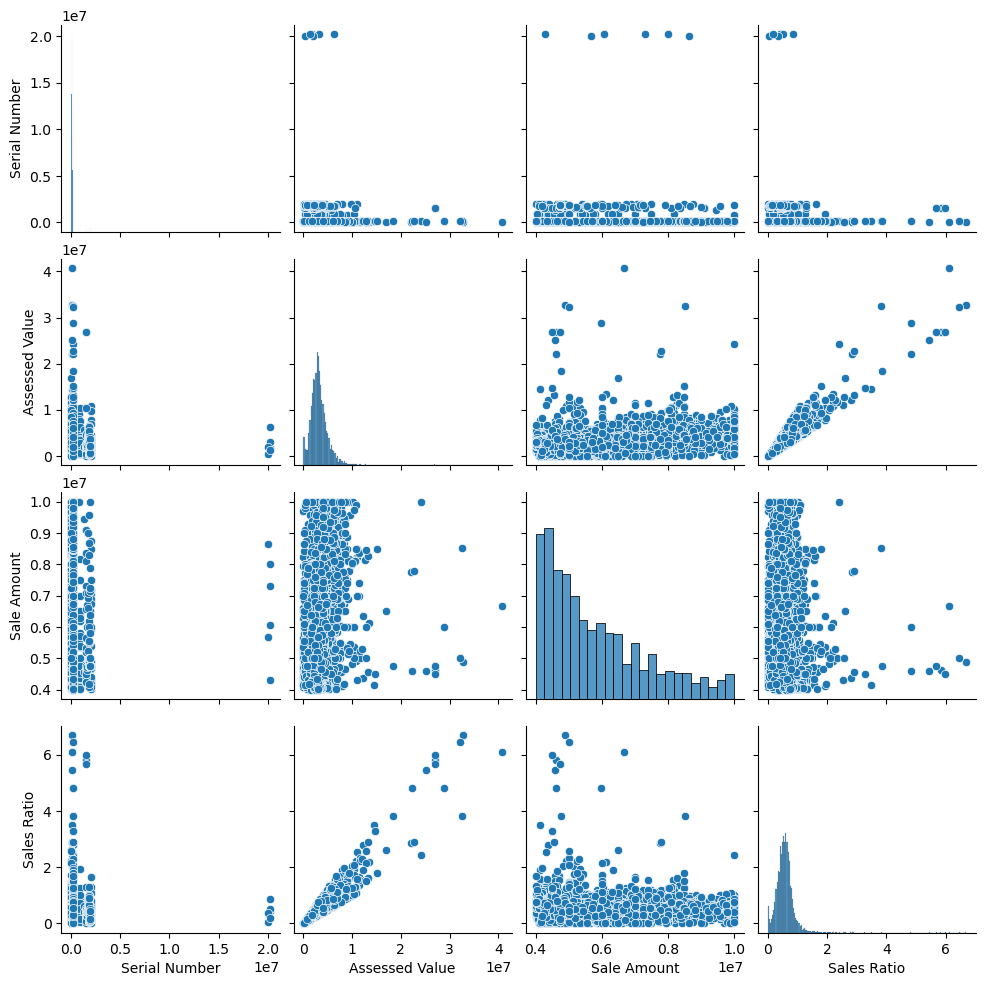

In [23]:
pairplot3=sns.pairplot(df3)
plt.show()

In [24]:
pairplot3.savefig(os.path.join(path, 'Analytics', 'range3_pairplot.png'))

#### Conclusions:
####  
1. The pairplot indicates an abnormal assignment of serial numbers to some real estates imedium and highis price ransge. The reason for this anomaly will be determined in future research#### 

2. The pairplots confirm the absence of a significant correlation between variables, except for the linear correlation between Ratio and Assessed Value. Both variables (Ratio and Assessed Value) exhibit distributions reminiscent of a normal distribution, suggesting that the values of the real estates were assigned without any external influences.  

### 03-8 Creating the Categorical Plots:

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month of Sale', ylabel='Count'>

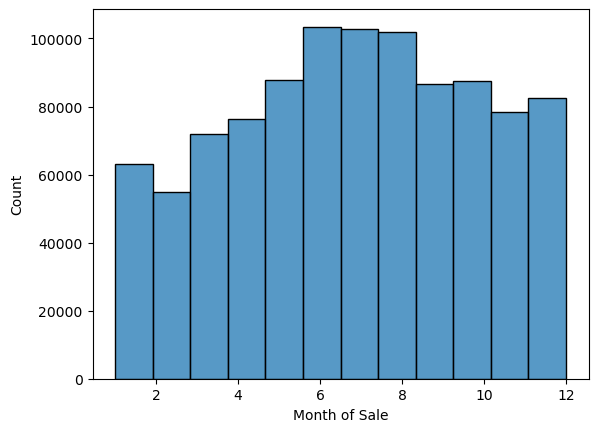

In [25]:
sns.histplot(df_re['Month of Sale'], bins = 12, kde = False)

### The conclusion: 
#### Seasonality is evident in the increased number of real estate properties sold during the summer months,
#### with the peak observed in June. 
#### The lowest level of sales (by number of deals) is observed in February, with the number of sales declining by threefold compared to June.   

### 03-8 Creating categorical plot with a new variable


In [26]:
###importing the sold real estate df
df_sold=pd.read_csv(os.path.join(path,'Data','Prepared Data','realestate_sold.csv'), index_col=0)

#### Deviding the Sale Amount to Price Ranges

In [27]:
df_sold.loc[df_sold['Sale Amount'] < 4000000, 'Price category'] = 'Low price'

C:\Users\user\AppData\Local\Temp\ipykernel_1576\4095633823.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Low price' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_sold.loc[df_sold['Sale Amount'] < 4000000, 'Price category'] = 'Low price'


In [28]:
df_sold.loc[(df_sold['Sale Amount'] >= 4000000) & (df_sold['Sale Amount'] < 10000000), 'Price category'] = 'Middle price'

In [29]:
df_sold.loc[df_sold['Sale Amount'] >= 10000000, 'Price category'] = 'High price'

In [31]:
df_sold['Price category'].value_counts(dropna = False)

Price category
Low price       989727
Middle price      4082
High price        1558
Name: count, dtype: int64

In [32]:
df_sold.columns

Index(['Serial Number', 'List Year', 'Town', 'Address', 'Assessed Value',
       'Sale Amount', 'Sales Ratio', 'Property Type', 'Residential Type',
       'Year of Sale', 'Month of Sale', 'Sale_Amount_Zscore',
       'Price category'],
      dtype='object')

C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

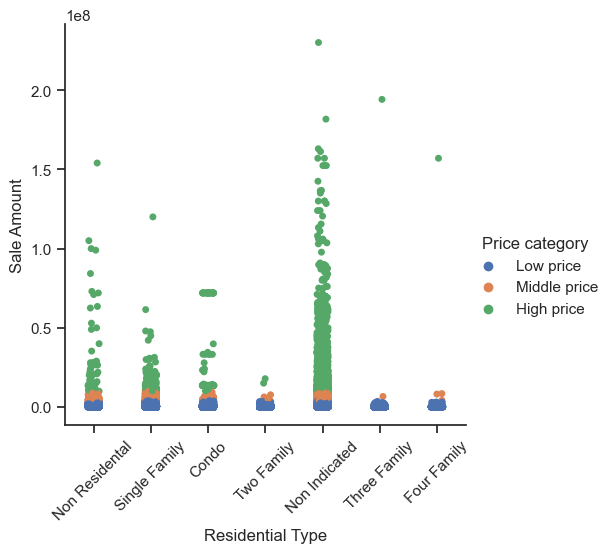

In [33]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="Residential Type", y="Sale Amount", hue="Price category", data=df_sold)
g.set_xticklabels(rotation=45)

In [34]:
# fig = g.get_figure()
g.savefig(os.path.join(path, 'Analytics', 'ResidentalType_SalePriceRange.png'))

#### Conclusions: The most of High Price Real Estate is residental but hasn't indicated residental type. The middle and Low price properties are evenly distribiuted by category.